原图：
 (960, 540, 3)
8*8的变换矩阵：
 [[ 2.07000e+02  1.51000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -0.00000e+00 -0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  2.07000e+02  1.51000e+02
   1.00000e+00 -0.00000e+00 -0.00000e+00]
 [ 5.17000e+02  2.85000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -1.74229e+05 -9.60450e+04]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  5.17000e+02  2.85000e+02
   1.00000e+00 -0.00000e+00 -0.00000e+00]
 [ 1.70000e+01  6.01000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -0.00000e+00 -0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.70000e+01  6.01000e+02
   1.00000e+00 -8.29600e+03 -2.93288e+05]
 [ 3.43000e+02  7.31000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -1.15591e+05 -2.46347e+05]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  3.43000e+02  7.31000e+02
   1.00000e+00 -1.67384e+05 -3.56728e+05]]
8*1的变换矩阵：
 [[ 8.92263779e-01]
 [ 3.76733596e-01]
 [-2.41585375e+02]
 [-4.08140258e-01]
 [ 9.44205

(<AxesSubplot:title={'center':'旋转-函数实现'}>,
 ([], []),
 ([], []),
 Text(0.5, 1.0, '旋转-函数实现'),
 <matplotlib.image.AxesImage at 0x22786e03b70>)

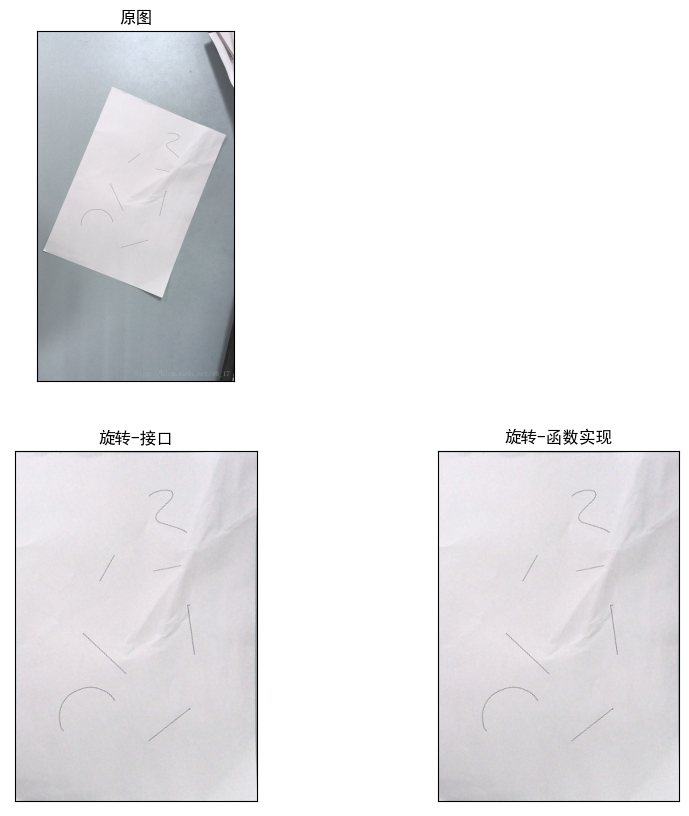

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 透视变换矩阵函数实现
def WarpPerspectiveMatrix(src, dst):
    assert src.shape[0] == dst.shape[0] and src.shape[0] >= 4
    
    nums = src.shape[0]
    A = np.zeros((2*nums, 8)) # A*warpMatrix=B
    B = np.zeros((2*nums, 1))
    for i in range(0, nums):
        A_i = src[i,:]
        B_i = dst[i,:]
        A[2*i, :] = [A_i[0], A_i[1], 1, 0, 0, 0,
                       -A_i[0]*B_i[0], -A_i[1]*B_i[0]]
        B[2*i] = B_i[0]
        
        A[2*i+1, :] = [0, 0, 0, A_i[0], A_i[1], 1,
                       -A_i[0]*B_i[1], -A_i[1]*B_i[1]]
        B[2*i+1] = B_i[1]
 
    A = np.mat(A)
    print("8*8的变换矩阵：\n",A)
    #用A.I求出A的逆矩阵，然后与B相乘，求出warpMatrix
    warpMatrix = A.I * B #求出a_11, a_12, a_13, a_21, a_22, a_23, a_31, a_32
    print("8*1的变换矩阵：\n", warpMatrix)
    #之后为结果的后处理
    warpMatrix = np.array(warpMatrix).T[0]
    print("转换成一维数组：\n", warpMatrix)
    warpMatrix = np.insert(warpMatrix, warpMatrix.shape[0], values=1.0, axis=0) #插入a_33 = 1
    print("插入a_33：\n", warpMatrix)
    warpMatrix = warpMatrix.reshape((3, 3))
    print("3*3矩阵-最终透视变换矩阵：\n", warpMatrix)
    return warpMatrix

image = cv2.imread("3.jpg")
result3 = image.copy() # 复制图像

# 透视变换的四个基准点，求出转换矩阵
src = np.float32([[207, 151], [517, 285], [17, 601], [343, 731]])
dst = np.float32([[0, 0], [337, 0], [0, 488], [337, 488]])
print("原图：\n",image.shape)

# 生成透视变换矩阵
m1 = cv2.getPerspectiveTransform(src, dst)
m2 = WarpPerspectiveMatrix(src, dst)
print("warpMatrix-接口:")
print(m1) # 输出透视变换矩阵
print("warpMatrix-函数实现:")
print(m2)

# 进行透视变换
result1 = cv2.warpPerspective(result3, m1, (337, 488))
result2 = cv2.warpPerspective(result3, m2, (337, 488))

# 图片效果展示
b,g,r = cv2.split(result)  
img_new1 = cv2.merge([r,g,b])
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文乱码
plt.figure(figsize=(10, 10)) # 调整图片大小
plt.subplot(221), plt.xticks([]), plt.yticks([]), plt.title('原图'), plt.imshow(image)
plt.subplot(223), plt.xticks([]), plt.yticks([]), plt.title('旋转-接口'), plt.imshow(result1)
plt.subplot(224), plt.xticks([]), plt.yticks([]), plt.title('旋转-函数实现'), plt.imshow(result2)